<a href="https://colab.research.google.com/github/priyakter/Project/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree #decision tree
from sklearn.metrics import accuracy_score #for accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [2]:
iris_data =pd.read_csv('IRIS.csv')

In [3]:
print(iris_data.shape)

(150, 5)


In [4]:
print(iris_data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
print(iris_data.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [6]:
print(iris_data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
target = iris_data['species']
print(pd.value_counts(target))

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<ipython-input-7-97ba68ed2224>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(target))


In [8]:
print(iris_data.groupby('species').size)

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7e8afa1b3210>>


In [9]:
seed=7
train_data,test_data= train_test_split(iris_data,test_size=0.3,random_state=7)
print('\n Shape of training data:',train_data.shape)
print('\n Shape of testing data:',test_data.shape)


 Shape of training data: (105, 5)

 Shape of testing data: (45, 5)


In [10]:
print(pd.value_counts(train_data['species']))
print(pd.value_counts(test_data['species']))

species
Iris-setosa        38
Iris-versicolor    34
Iris-virginica     33
Name: count, dtype: int64
species
Iris-virginica     17
Iris-versicolor    16
Iris-setosa        12
Name: count, dtype: int64


<ipython-input-10-cf8b9742e33d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_data['species']))
<ipython-input-10-cf8b9742e33d>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(test_data['species']))


In [11]:
seed=7
train_data,test_data= train_test_split(iris_data,test_size=0.3,random_state=7,stratify=target)
print('\n Shape of training data:',train_data.shape)
print('\n Shape of testing data:',test_data.shape)


 Shape of training data: (105, 5)

 Shape of testing data: (45, 5)


In [12]:
print(pd.value_counts(train_data['species']))
print(pd.value_counts(test_data['species']))

species
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: count, dtype: int64
species
Iris-versicolor    15
Iris-virginica     15
Iris-setosa        15
Name: count, dtype: int64


<ipython-input-12-cf8b9742e33d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_data['species']))
<ipython-input-12-cf8b9742e33d>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(test_data['species']))


In [13]:
train_x=train_data.drop('species',axis=1)
train_y=train_data['species']
test_x=test_data.drop('species',axis=1)
test_y=test_data['species']

In [14]:
#Normalization
scaler=MinMaxScaler()
normalization_data=scaler.fit_transform(train_x)
print('\n Normalization Train Data: ',normalization_data)


 Normalization Train Data:  [[0.30555556 0.36363636 0.59322034 0.58333333]
 [0.30555556 0.54545455 0.08474576 0.125     ]
 [0.94444444 0.27272727 0.96610169 0.79166667]
 [0.41666667 0.22727273 0.69491525 0.75      ]
 [0.02777778 0.45454545 0.05084746 0.04166667]
 [0.05555556 0.04545455 0.05084746 0.08333333]
 [0.80555556 0.63636364 0.86440678 1.        ]
 [0.55555556 0.13636364 0.6779661  0.75      ]
 [0.08333333 0.54545455 0.06779661 0.08333333]
 [0.5        0.36363636 0.66101695 0.70833333]
 [0.33333333 0.90909091 0.06779661 0.04166667]
 [0.36111111 0.13636364 0.49152542 0.41666667]
 [0.41666667 0.18181818 0.50847458 0.45833333]
 [0.55555556 0.5        0.84745763 1.        ]
 [0.61111111 0.36363636 0.76271186 0.70833333]
 [0.44444444 0.36363636 0.54237288 0.58333333]
 [0.22222222 0.68181818 0.08474576 0.125     ]
 [0.30555556 0.77272727 0.11864407 0.125     ]
 [0.66666667 0.5        0.79661017 1.        ]
 [0.66666667 0.36363636 0.6779661  0.66666667]
 [0.66666667 0.36363636 0.71186

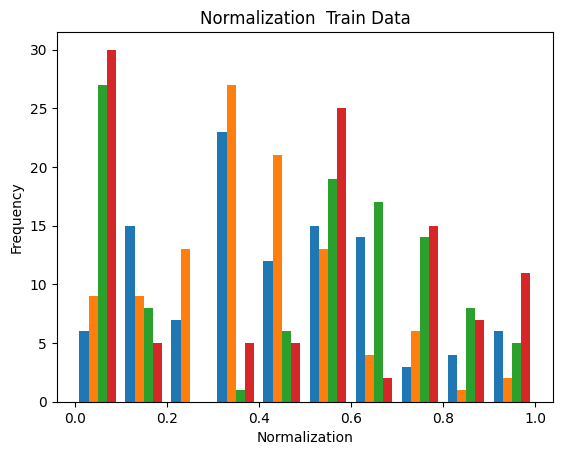

In [15]:
import matplotlib.pyplot as plt
plt.hist(normalization_data)
plt.xlabel('Normalization')
plt.ylabel('Frequency')
plt.title('Normalization  Train Data')
plt.show()

In [16]:
normalization_data1=scaler.fit_transform(test_x)
print('\n Normalization Test Data: ',normalization_data1)


 Normalization Test Data:  [[0.25       0.25       0.38297872 0.42857143]
 [0.60714286 0.4        0.59574468 0.52380952]
 [0.82142857 0.25       0.9787234  0.76190476]
 [0.21428571 0.8        0.04255319 0.        ]
 [0.17857143 0.2        0.44680851 0.38095238]
 [0.25       0.9        0.06382979 0.04761905]
 [0.64285714 0.4        0.76595745 0.76190476]
 [0.85714286 0.5        0.91489362 0.9047619 ]
 [0.67857143 0.35       0.78723404 0.76190476]
 [0.5        1.         0.         0.        ]
 [0.25       0.65       0.10638298 0.14285714]
 [0.71428571 0.6        0.87234043 1.        ]
 [0.25       0.9        0.14893617 0.0952381 ]
 [0.60714286 0.5        0.72340426 0.57142857]
 [0.57142857 0.7        0.70212766 0.66666667]
 [0.92857143 0.6        0.74468085 0.57142857]
 [0.67857143 0.45       0.93617021 0.76190476]
 [0.5        0.35       0.57446809 0.47619048]
 [1.         0.5        0.9787234  0.66666667]
 [0.46428571 0.25       0.80851064 0.85714286]
 [0.21428571 0.7        0.085106

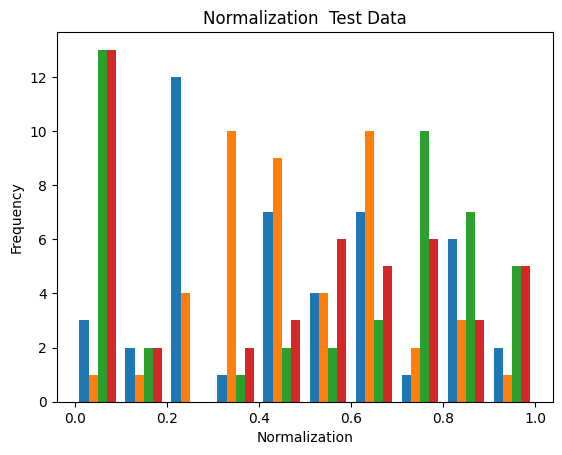

In [17]:
plt.hist(normalization_data1)
plt.xlabel('Normalization')
plt.ylabel('Frequency')
plt.title('Normalization  Test Data')
plt.show()

In [18]:
#standardization
scaler=StandardScaler()
standardization_data=scaler.fit_transform(train_x)
print('\n Standardization Train Data: ',standardization_data)


 Standardization Train Data:  [[-5.72342356e-01 -1.46354719e-01  3.84731833e-01  3.77246355e-01]
 [-5.72342356e-01  7.57600901e-01 -1.27314132e+00 -1.03284924e+00]
 [ 2.11155432e+00 -5.98332529e-01  1.60050548e+00  1.01819890e+00]
 [-1.05577716e-01 -8.24321435e-01  7.16306464e-01  8.90008391e-01]
 [-1.73925396e+00  3.05623091e-01 -1.38366620e+00 -1.28923026e+00]
 [-1.62256280e+00 -1.72827705e+00 -1.38366620e+00 -1.16103975e+00]
 [ 1.52809852e+00  1.20957871e+00  1.26893085e+00  1.65915144e+00]
 [ 4.77878084e-01 -1.27629924e+00  6.61044025e-01  8.90008391e-01]
 [-1.50587164e+00  7.57600901e-01 -1.32840376e+00 -1.16103975e+00]
 [ 2.44495764e-01 -1.46354719e-01  6.05781587e-01  7.61817882e-01]
 [-4.55651196e-01  2.56551214e+00 -1.32840376e+00 -1.28923026e+00]
 [-3.38960036e-01 -1.27629924e+00  5.31572027e-02 -1.35515681e-01]
 [-1.05577716e-01 -1.05031034e+00  1.08419641e-01 -7.32517194e-03]
 [ 4.77878084e-01  5.31611996e-01  1.21366841e+00  1.65915144e+00]
 [ 7.11260404e-01 -1.46354719e-

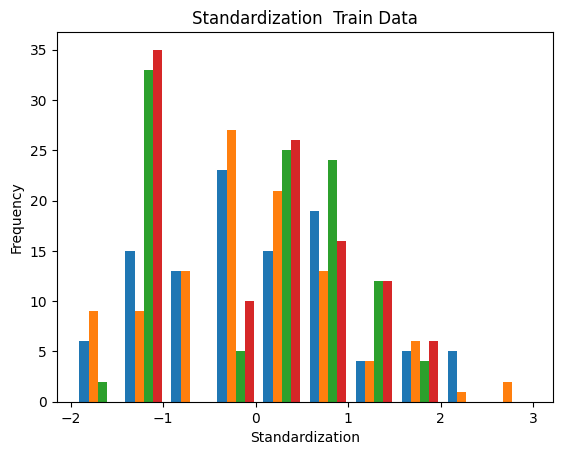

In [19]:
plt.hist(standardization_data)
plt.xlabel('Standardization')
plt.ylabel('Frequency')
plt.title('Standardization  Train Data')
plt.show()

In [20]:
standardization_data1=scaler.fit_transform(test_x)
print('\n Standardization Test Data: ',standardization_data1)


 Standardization Test Data:  [[-0.8622124  -1.3031367  -0.40120156 -0.11534598]
 [ 0.4991756  -0.56396252  0.21288246  0.16522533]
 [ 1.31600839 -1.3031367   1.3182337   0.86665361]
 [-0.99835119  1.40716862 -1.383736   -1.37791689]
 [-1.13448999 -1.54952809 -0.21697635 -0.25563164]
 [-0.8622124   1.8999514  -1.32232759 -1.23763123]
 [ 0.6353144  -0.56396252  0.70414968  0.86665361]
 [ 1.45214719 -0.07117974  1.13400849  1.28751058]
 [ 0.7714532  -0.81035391  0.76555808  0.86665361]
 [ 0.0907592   2.39273418 -1.5065528  -1.37791689]
 [-0.8622124   0.66799444 -1.19951079 -0.95705992]
 [ 0.90759199  0.42160305  1.01119169  1.56808189]
 [-0.8622124   1.8999514  -1.07669398 -1.09734558]
 [ 0.4991756  -0.07117974  0.58133287  0.30551098]
 [ 0.3630368   0.91438583  0.51992447  0.5860823 ]
 [ 1.72442479  0.42160305  0.64274128  0.30551098]
 [ 0.7714532  -0.31757113  1.1954169   0.86665361]
 [ 0.0907592  -0.81035391  0.15147406  0.02493967]
 [ 1.99670239 -0.07117974  1.3182337   0.5860823 ]
 

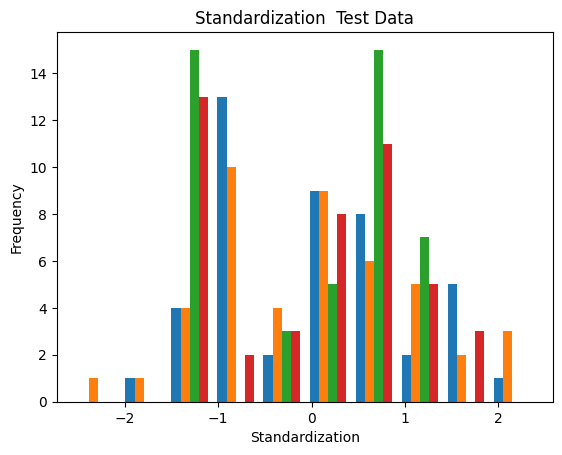

In [21]:
plt.hist(standardization_data1)
plt.xlabel('Standardization')
plt.ylabel('Frequency')
plt.title('Standardization  Test Data')
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier()
model_KNN.fit(train_x,train_y)

KNeighborsClassifier()

In [23]:
predictions_train2=model_KNN.predict(train_x)
train2=accuracy_score(train_y,predictions_train2)
print('\n Training Accuracy:',train2)


 Training Accuracy: 0.9809523809523809


In [24]:
predictions_test2=model_KNN.predict(test_x)
test2=accuracy_score(test_y,predictions_test2)
print('\n Testing Accuracy:',test2)


 Testing Accuracy: 0.9555555555555556


In [26]:
model_DT=tree.DecisionTreeClassifier()
model_DT.fit(train_x,train_y)

DecisionTreeClassifier()

In [27]:
predictions_train=model_DT.predict(train_x)
train=accuracy_score(train_y,predictions_train)
print('\n Training Accuracy:',train)



 Training Accuracy: 1.0


In [28]:
predictions_test=model_DT.predict(test_x)
test=accuracy_score(train_y,predictions_train)
print('\n Testing Accuracy:',test)


 Testing Accuracy: 1.0


In [29]:
from sklearn.svm import SVC
model_SVM=SVC()
model_SVM.fit(train_x,train_y)

SVC()

In [30]:
predictions_trains=model_SVM.predict(train_x)
trains=accuracy_score(train_y,predictions_train)
print('\n Training Accuracy:',trains)


 Training Accuracy: 1.0


In [31]:
predictions_tests=model_SVM.predict(test_x)
tests=accuracy_score(test_y,predictions_test)
print('\n Testing Accuracy:',tests)


 Testing Accuracy: 0.9777777777777777


In [32]:
model_lr=LogisticRegression()
model_lr.fit(train_x,train_y)

LogisticRegression()

In [33]:
predictions_train1=model_lr.predict(train_x)
train1=accuracy_score(train_y,predictions_train1)
print('\n Train Accuracy:',train1)


 Train Accuracy: 0.9714285714285714


In [34]:
predictions_test1=model_lr.predict(test_x)
test1=accuracy_score(test_y,predictions_test1)
print('\n Test Accuracy: ',test1)


 Test Accuracy:  0.9333333333333333


In [35]:
from tabulate import tabulate
result=[]
model=['DT','SVM','LR','KNN']
train_acc=[train,trains,train1,train2]
test_acc=[test,tests,test1,test2]
for i in range(len(model)):
    result.append([model[i],train_acc[i],test_acc[i]])

df=pd.DataFrame(result,columns=['Model','Training Accuracy','Testing Accuracy'])
print(df)


  Model  Training Accuracy  Testing Accuracy
0    DT           1.000000          1.000000
1   SVM           1.000000          0.977778
2    LR           0.971429          0.933333
3   KNN           0.980952          0.955556
